In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import scipy.special as sp
import os 
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from dgutils import colors as colortools
dblsize = [0.86*6.4,0.86*2.86312]

In [2]:
filenames=os.listdir('../data/ed')
filenamesdmrg = os.listdir('../data/dmrg')

In [3]:
try:
    filenames.remove('.ipynb_checkpoints')
    filenamesdmrg.remove('.ipynb_checkpoints')
except:
    pass

In [4]:
ratios=[2,3,4,5,6,7,8]
def getkey(n,N):
    ratio=N/n
    if ratio in ratios:
        key = f'{int(ratio)}'
        return key
    else:
        return False

In [5]:
def addData(α,v, Nvalues, Svalues):
    for i in range(len(filenames)):    
        fn = filenames[i]
        n = int(fn.split("_")[2][1:])
        N = int(fn.split("_")[4][1:])
        key=getkey(n,N)
        if key != False:
            with open('../data/ed/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/ed/'+fn,encoding="utf-8")    
            try:
                V  = data[:,0]
                S = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S = np.array([data[α]])
            if v in V:
                idx = np.where(V==v)
                Nvalues[key].append(N)
                Svalues[key].append(S[idx])
    for i in range(len(filenamesdmrg)):    
        fn = filenamesdmrg[i]
        n = int(fn.split("_")[2][1:])
        N = int(fn.split("_")[4][1:])
        key=getkey(n,N)
        if key != False:
            with open('../data/dmrg/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/dmrg/'+fn,encoding="utf-8")    
            try:
                V  = data[:,0]
                S = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S = np.array([data[α]])
            if v in V:
                if N not in Nvalues[key]:
                    idx = np.where(V==v)
                    Nvalues[key].append(N)
                    Svalues[key].append(S[idx])

In [6]:
α=1
v=-1.65
N2=[]
N3=[]
N4=[]
N5=[]
N6=[]
N7=[]
N8=[]
S2=[]
S3=[]
S4=[]
S5=[]
S6=[]
S7=[]
S8=[]
Nvalues={'2':N2,'3':N3,'4':N4,'5':N5,'6':N6,'7':N7,'8':N8}
Svalues={'2':S2,'3':S3,'4':S4,'5':S5,'6':S6,'7':S7,'8':S8}
addData(α,v,Nvalues, Svalues)

In [7]:
def fitfunc(x,a,b):
    return a*x+b
from scipy.optimize import curve_fit

N/n=2,$S_\alpha=(7.650e-02\pm6.506e-04)N+-2.327e-02\pm6.263e-03$
N/n=3,$S_\alpha=(6.506e-02\pm4.016e-04)N+-1.251e-02\pm4.427e-03$
N/n=4,$S_\alpha=(5.367e-02\pm5.864e-04)N+-1.924e-02\pm6.423e-03$
N/n=5,$S_\alpha=(4.464e-02\pm4.897e-04)N+-1.492e-02\pm5.289e-03$
N/n=6,$S_\alpha=(3.765e-02\pm2.788e-04)N+-8.110e-03\pm3.613e-03$
N/n=7,$S_\alpha=(3.259e-02\pm1.947e-04)N+-4.875e-03\pm2.944e-03$
N/n=8,$S_\alpha=(2.869e-02\pm1.316e-04)N+-2.411e-03\pm2.274e-03$


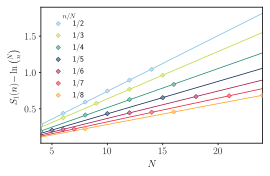

In [8]:
colors=["#7EBCE6","#bdd73c","#1A896F","#0B2456",'#A40E4C',"#E71D36","#FF9F1C"]
Sarrays=[S2,S3,S4,S5,S6,S7,S8]
Narrays=[N2,N3,N4,N5,N6,N7,N8]
ratios=[2,3,4,5,6,7,8]
plt.style.reload_library()
with plt.style.context('../include/IOP.mplstyle'):
    for i in range(len(Nvalues)):
        Sarray = np.array(Sarrays[i])
        Sarray = Sarray.reshape((-1,))
        Narray = Narrays[i]
        fit, cov = curve_fit(fitfunc,Narray,Sarray)
        perr=np.sqrt(np.diag(cov))
        ratio = ratios[i]
        N=np.linspace(4,24,20)
        plt.plot(N,fitfunc(N,*fit),color=colors[i])
        print(rf'N/n={ratio},$S_\alpha=(%.3e\pm%.3e)N+%.3e\pm%.3e$'% (fit[0],perr[0],fit[1],perr[1]))
        plt.scatter(Narray,Sarray,marker='D',linewidths=0.5,s=10,
                        c=colortools.get_alpha_hex(colors[i],0.5),zorder=10, edgecolors=colors[i],label=(rf'1/{ratio}'))
    plt.text(7.4,1.77,r'$n/N$',ha="right",va="center",size='x-small')
    plt.xlabel(r'$N$')
    plt.xlim(4,24)
    plt.ylabel(rf'$S_{α}(n)$'+r'$-\ln{N \choose n}$')
    plt.legend(loc="upper left",bbox_to_anchor=(.01,.96),fontsize=8)
    #plt.savefig('../figures/Fig09_alpha1v-1.65fixedratios.pdf')

N/n=2,$S_\alpha=(7.650e-02\pm6.506e-04)N+-2.327e-02\pm6.263e-03$
N/n=3,$S_\alpha=(7.513e-02\pm4.638e-04)N+-1.445e-02\pm5.112e-03$
N/n=4,$S_\alpha=(7.591e-02\pm8.292e-04)N+-2.721e-02\pm9.084e-03$
N/n=5,$S_\alpha=(7.595e-02\pm8.331e-04)N+-2.538e-02\pm8.999e-03$
N/n=6,$S_\alpha=(7.530e-02\pm5.575e-04)N+-1.622e-02\pm7.226e-03$
N/n=7,$S_\alpha=(7.510e-02\pm4.486e-04)N+-1.124e-02\pm6.784e-03$
N/n=8,$S_\alpha=(7.498e-02\pm3.439e-04)N+-6.301e-03\pm5.943e-03$


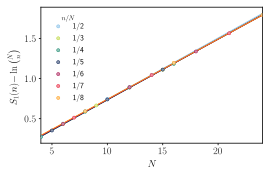

In [9]:

Sarrays=[S2,S3,S4,S5,S6,S7,S8]
Narrays=[N2,N3,N4,N5,N6,N7,N8]
ratios=[2,3,4,5,6,7,8]
plt.style.reload_library()
with plt.style.context('../include/IOP.mplstyle'):
    for i in range(len(Nvalues)):
        Sarray = np.array(Sarrays[i])
        Sarray = Sarray.reshape((-1,))
        Narray = Narrays[i]
        ratio = ratios[i]
        fit, cov = curve_fit(fitfunc,Narray,Sarray/np.sin(np.pi/ratio))
        perr=np.sqrt(np.diag(cov))
        N=np.linspace(4,24,20)
        plt.plot(N,fitfunc(N,*fit),color=colors[i])
        print(rf'N/n={ratio},$S_\alpha=(%.3e\pm%.3e)N+%.3e\pm%.3e$'% (fit[0],perr[0],fit[1],perr[1]))
        #plt.plot(Narray,Sarray,marker='o',ms=2,color=colors[i],label=(rf'N/n={ratio},$S_\alpha=(%.3e\pm%.3e)N+%.3e\pm%.3e$'% (fit[0],perr[0],fit[1],perr[1])))
        plt.scatter(Narray,Sarray/np.sin(np.pi/ratio),marker='o',linewidths=0.5,s=10,
                        c=colortools.get_alpha_hex(colors[i],0.5),zorder=10, edgecolors=colors[i],label=(rf'1/{ratio}'))
    plt.text(7.3,1.75,r'$n/N$',ha="right",va="center",size='x-small')
    plt.xlabel(r'$N$')
    plt.xlim(4,24)
    plt.ylabel(rf'$S_{α}(n)$'+r'$-\ln{N \choose n}$')
    plt.legend(loc="upper left",bbox_to_anchor=(.01,.94),fontsize=8)

N/n=2,$S_\alpha=(7.650e-02\pm6.506e-04)N+-2.327e-02\pm6.263e-03$
N/n=3,$S_\alpha=(6.506e-02\pm4.016e-04)N+-1.251e-02\pm4.427e-03$
N/n=4,$S_\alpha=(5.367e-02\pm5.864e-04)N+-1.924e-02\pm6.423e-03$
N/n=5,$S_\alpha=(4.464e-02\pm4.897e-04)N+-1.492e-02\pm5.289e-03$
N/n=6,$S_\alpha=(3.765e-02\pm2.788e-04)N+-8.110e-03\pm3.613e-03$
N/n=7,$S_\alpha=(3.259e-02\pm1.947e-04)N+-4.875e-03\pm2.944e-03$
N/n=8,$S_\alpha=(2.869e-02\pm1.316e-04)N+-2.411e-03\pm2.274e-03$
N/n=2,$S_\alpha=(7.650e-02\pm6.506e-04)N+-2.327e-02\pm6.263e-03$
N/n=3,$S_\alpha=(7.513e-02\pm4.638e-04)N+-1.445e-02\pm5.112e-03$
N/n=4,$S_\alpha=(7.591e-02\pm8.292e-04)N+-2.721e-02\pm9.084e-03$
N/n=5,$S_\alpha=(7.595e-02\pm8.331e-04)N+-2.538e-02\pm8.999e-03$
N/n=6,$S_\alpha=(7.530e-02\pm5.575e-04)N+-1.622e-02\pm7.226e-03$
N/n=7,$S_\alpha=(7.510e-02\pm4.486e-04)N+-1.124e-02\pm6.784e-03$
N/n=8,$S_\alpha=(7.498e-02\pm3.439e-04)N+-6.301e-03\pm5.943e-03$


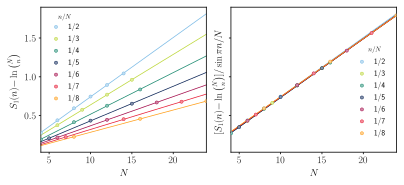

In [10]:
plt.style.reload_library()
with plt.style.context('../include/IOP.mplstyle'):
    fig, axs = plt.subplots(1,2,sharey=True, constrained_layout=True, figsize=dblsize, sharex=False)
    #plt.subplots_adjust(wspace=.05) 
    ax1 = axs[0]
    for i in range(len(Nvalues)):
        Sarray = np.array(Sarrays[i])
        Sarray = Sarray.reshape((-1,))
        Narray = Narrays[i]
        fit, cov = curve_fit(fitfunc,Narray,Sarray)
        perr=np.sqrt(np.diag(cov))
        ratio = ratios[i]
        N=np.linspace(4,24,20)
        ax1.plot(N,fitfunc(N,*fit),color=colors[i])
        print(rf'N/n={ratio},$S_\alpha=(%.3e\pm%.3e)N+%.3e\pm%.3e$'% (fit[0],perr[0],fit[1],perr[1]))
        ax1.scatter(Narray,Sarray,marker='o',linewidths=0.5,s=10,
                        c=colortools.get_alpha_hex(colors[i],0.5),zorder=10, edgecolors=colors[i],label=(rf'1/{ratio}'))
    ax1.text(8,1.77,r'$n/N$',ha="right",va="center",size='x-small')
    ax1.set_xlabel(r'$N$')
    ax1.set_xlim(4,24)
    ax1.set_ylabel(rf'$S_{α}(n)$'+r'$-\ln{N \choose n}$')
    ax1.legend(loc="upper left",handletextpad=.5,bbox_to_anchor=(0,.94),fontsize=8)
    
    ax2 = axs[1]
    for i in range(len(Nvalues)):
        Sarray = np.array(Sarrays[i])
        Sarray = Sarray.reshape((-1,))
        Narray = Narrays[i]
        ratio = ratios[i]
        fit, cov = curve_fit(fitfunc,Narray,Sarray/np.sin(np.pi/ratio))
        perr=np.sqrt(np.diag(cov))
        N=np.linspace(4,24,20)
        ax2.plot(N,fitfunc(N,*fit),color=colors[i])
        print(rf'N/n={ratio},$S_\alpha=(%.3e\pm%.3e)N+%.3e\pm%.3e$'% (fit[0],perr[0],fit[1],perr[1]))
        #plt.plot(Narray,Sarray,marker='o',ms=2,color=colors[i],label=(rf'N/n={ratio},$S_\alpha=(%.3e\pm%.3e)N+%.3e\pm%.3e$'% (fit[0],perr[0],fit[1],perr[1])))
        ax2.scatter(Narray,Sarray/np.sin(np.pi/ratio),marker='o',linewidths=0.5,s=10,
                        c=colortools.get_alpha_hex(colors[i],0.5),zorder=10, edgecolors=colors[i],label=(rf'1/{ratio}'))
    ax2.text(22.5,1.35,r'$n/N$',ha="right",va="center",size='x-small')
    ax2.set_xlabel(r'$N$')
    ax2.set_xlim(4,24)
    ax2.set_ylabel(rf'$[S_{α}(n)$'+r'$-\ln{N \choose n}]/\sin{(\pi n/N)}$')
    ax2.legend(loc="upper left",handletextpad=.5,bbox_to_anchor=(.7,.7),fontsize=8)
    
    #plt.savefig('../Figures/Fig10_fixedratiosv-1.65double.pdf')
